<a href="https://colab.research.google.com/github/fpinell/mlsa/blob/main/notebooks/test_and_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Software Analysis (MLSA)

### University of Florence / IMT School for advanced studies Lucca


#### Fabio Pinelli
<a href="mailto:fabio.pinelli@imtlucca.it">fabio.pinelli@imtlucca.it</a><br/>
IMT School for Advanced Studies Lucca<br/>
2024/2025<br/>
October, 22 2024


### What I'll do

- Try to help you during the test
- Load your uploaded files and trying to evaluate your solution
- Explore a possible solution :-)  

### Load your uploaded files and trying to evaluate your solution

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df_train = pd.read_csv('/content/drive/Shareddrives/phd_hands_on/data/titanic/train.csv')

In [ ]:
df_test = pd.read_csv('/content/drive/Shareddrives/phd_hands_on/data/titanic/test.csv')

In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_train[['PassengerId','Survived']].to_csv('/content/drive/Shareddrives/phd_hands_on/test/fabio.csv',index=False,sep=',')

In [ ]:
directory = '/content/drive/Shareddrives/phd_hands_on/test/'

In [ ]:
files = glob(directory+ '*.csv')

In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix

results = {
    'name':[],
    'precision':[],
    'recall':[],
    'accuracy':[]
}

for f in files:

  try:

    student_name = f.split('/')[-1].split('.csv')[0]
    solution = pd.read_csv(f)
    df_merge = pd.merge(solution,df_train[['PassengerId']],on='PassengerId')

    precision = precision_score(df_train['Survived'],df_merge['Survived'])
    recall = recall_score(df_train['Survived'],df_merge['Survived'])
    accuracy = accuracy_score(df_train['Survived'],df_merge['Survived'])

    print('{} got {} precision'.format(student_name,precision))
    print('{} got {} recall'.format(student_name,recall))
    print('{} got {} accuracy'.format(student_name,accuracy))

    results['name'].append(student_name)
    results['precision'].append(precision)
    results['recall'].append(recall)
    results['accuracy'].append(accuracy)
  except Exception as e:
    print("Failed reading the file {}".format(f))
    print("with exception {}".format(e))

df_results = pd.DataFrame(results)

fabio_2 got 1.0 precision
fabio_2 got 1.0 recall
fabio_2 got 1.0 accuracy
fabio got 1.0 precision
fabio got 1.0 recall
fabio got 1.0 accuracy


In [ ]:
df_results.sort_values(by='accuracy',ascending=False)

,name,precision,recall,accuracy
0,fabio_2,1.0,1.0,1.0
1,fabio,1.0,1.0,1.0


# Possible solution

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression,LogisticRegression, Lasso
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import recall_score,precision_score,accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler

import xgboost as xgb
from xgboost import XGBClassifier

import pandas as pd

In [5]:
df_train = pd.read_csv('https://raw.githubusercontent.com/fpinell/mlsa/refs/heads/main/data/titanic/train_mlsa.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/fpinell/mlsa/refs/heads/main/data/titanic/test_mlsa.csv')

In [9]:
df_train.shape

(791, 12)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  791 non-null    int64  
 1   Survived     791 non-null    int64  
 2   Pclass       791 non-null    int64  
 3   Name         791 non-null    object 
 4   Sex          791 non-null    object 
 5   Age          634 non-null    float64
 6   SibSp        791 non-null    int64  
 7   Parch        791 non-null    int64  
 8   Ticket       791 non-null    object 
 9   Fare         791 non-null    float64
 10  Cabin        179 non-null    object 
 11  Embarked     789 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 74.3+ KB


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,791.000000,791.000000,791.000000,634.000000,791.000000,791.000000,791.0000
mean,444.896334,0.384324,2.310999,29.697429,0.519595,0.395702,32.0388
std,256.946494,0.486743,0.834004,14.621325,1.104333,0.829172,47.8932
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.0000
25%,225.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.8958
50%,441.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.4542
75%,664.500000,1.000000,3.000000,38.750000,1.000000,0.000000,31.0000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.3292


In [8]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,791.000000,791.000000,791.000000,791,791,634.000000,791.000000,791.000000,791,791.0000,179,789
unique,NaN,NaN,NaN,791,2,NaN,NaN,NaN,618,NaN,136,3
top,NaN,NaN,NaN,"Johansson, Mr. Gustaf Joel",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,510,NaN,NaN,NaN,6,NaN,4,574
mean,444.896334,0.384324,2.310999,NaN,NaN,29.697429,0.519595,0.395702,NaN,32.0388,NaN,NaN
std,256.946494,0.486743,0.834004,NaN,NaN,14.621325,1.104333,0.829172,NaN,47.8932,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.0000,NaN,NaN
25%,225.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.8958,NaN,NaN
50%,441.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.4542,NaN,NaN
75%,664.500000,1.000000,3.000000,NaN,NaN,38.750000,1.000000,0.000000,NaN,31.0000,NaN,NaN


Okay, the **Age**, **Cabin** and **Embarked** attributes are sometimes null (less than 891 non-null), especially the Cabin (77% are null).

**We will ignore the Cabin for now and focus on the rest**.

The Age attribute has about 19% null values, so we will need to decide what to do with them --> **Replacing null values** with the median age seems reasonable.

In [10]:
df_train = df_train[['PassengerId','Survived','Pclass',
                     'Sex', 'Age', 'SibSp','Parch',
                     'Fare', 'Embarked']].copy()

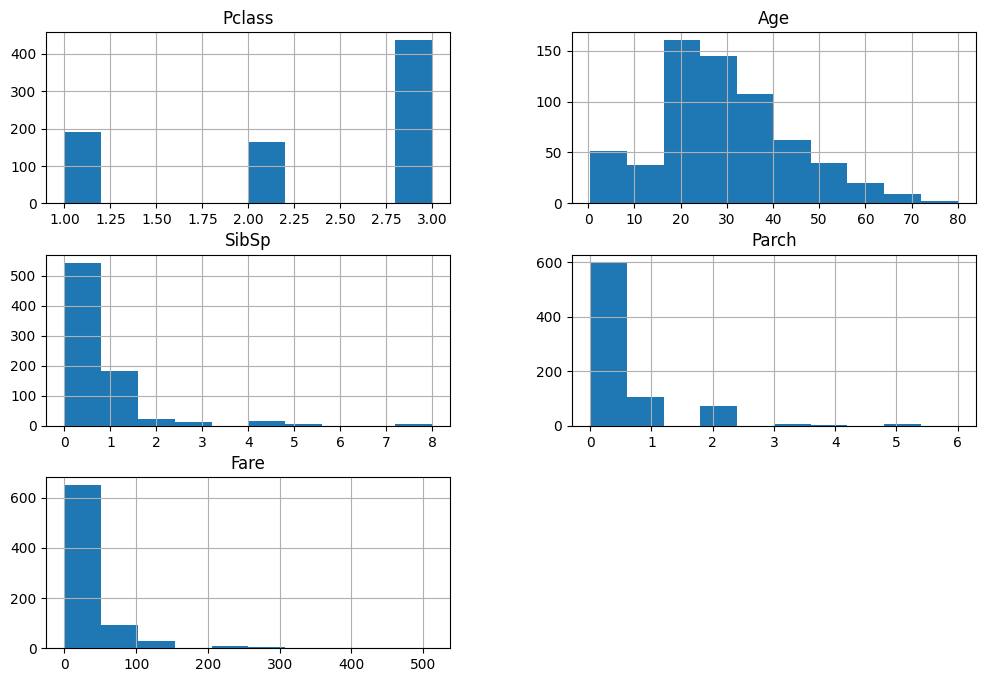

In [12]:
attributes = ['Pclass','Age','SibSp','Parch','Fare']

_ = df_train[attributes].hist(figsize=(12, 8))

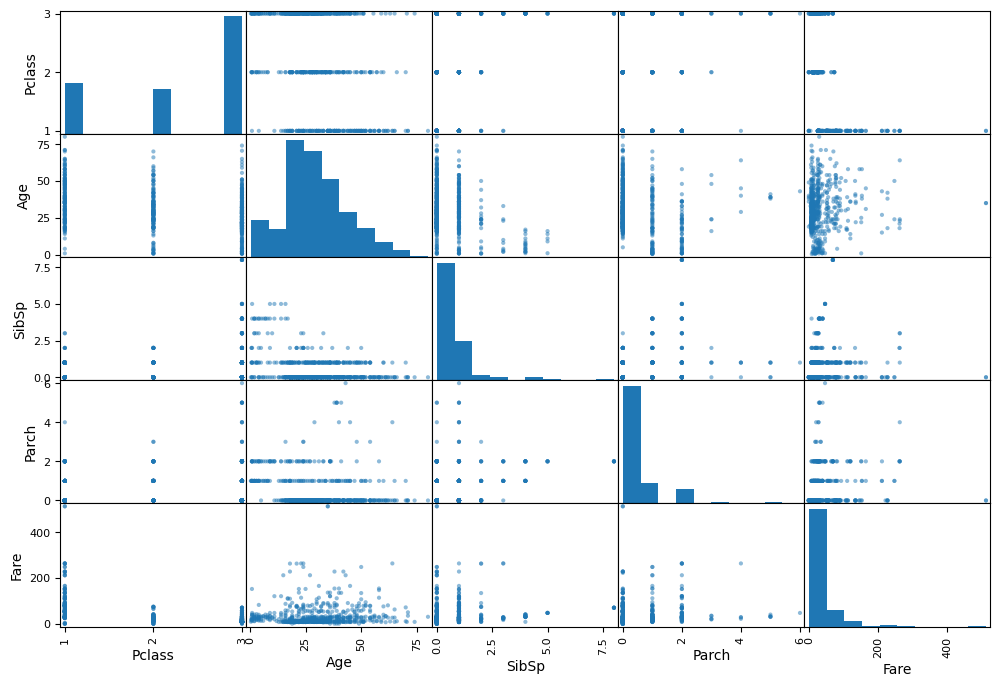

In [13]:
from pandas.plotting import scatter_matrix

_ = scatter_matrix(df_train[attributes], figsize=(12, 8))

In [14]:
df_train.Embarked.value_counts()

,count
Embarked,
S,574
C,152
Q,63


In [15]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [16]:
SimpleImputer(strategy='most_frequent')

SimpleImputer(strategy='most_frequent')

In [18]:

cat_colums = ["Pclass", "Sex", "Embarked"]
cat_pipeline = Pipeline([
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse_output=False)),
    ])


In [19]:
num_columns = ["Age", "SibSp", "Parch", "Fare"]
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", MinMaxScaler())
    ])

In [20]:

column_transform = ColumnTransformer([
    ('cat',cat_pipeline,cat_colums),
    ('num',num_pipeline,num_columns)
    ],
    remainder='passthrough' # the columns not included on the previous list are
                            # preprocessed, left as they are
)

In [37]:
X_train = df_train.drop(columns=['Survived','PassengerId'])
y_train = df_train['Survived']

In [38]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,33.0,0,0,8.6542,S
1,3,male,42.0,0,0,8.6625,S
2,3,male,2.0,3,1,21.0750,S
3,2,female,24.0,0,0,13.0000,S
4,3,male,21.0,0,0,8.4333,S


In [39]:
pipeline = Pipeline(steps=[('preprocessor',column_transform),('classifier',RandomForestClassifier(random_state=42))])
params = [{'preprocessor': [column_transform],
          'classifier': [GradientBoostingClassifier(random_state=42),RandomForestClassifier(random_state=42),XGBClassifier(random_state=42)],
           'preprocessor__num__scaler': ['passthrough',MinMaxScaler(),StandardScaler()]
        }]

gs = GridSearchCV(pipeline,params , verbose=5, n_jobs=5,scoring='accuracy', cv=5).fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [77]:
full_pipeline = Pipeline([
    ("preprocessor", column_transform),
    ("classifier", RandomForestClassifier(random_state=42))
])
param_grid = [{ 'preprocessor__num__scaler': ['passthrough',MinMaxScaler(),StandardScaler()],
                'preprocessor__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
                'classifier__n_estimators': [100, 200],
                'classifier__max_depth': [None, 10, 20]
              },
              { 'preprocessor__num__scaler': ['passthrough',MinMaxScaler(),StandardScaler()],
                'preprocessor__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
                'classifier': [GradientBoostingClassifier(random_state=42)],
                'classifier__n_estimators': [100, 200],
                'classifier__max_depth': [None, 10, 20]
              }
              ]

# Set up GridSearchCV
grid_search = GridSearchCV(full_pipeline, param_grid, cv=5, scoring='accuracy').fit(X_train, y_train)


In [78]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   MostFrequentImputer()),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   'passthrough')]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        random_state=42))])

In [42]:
pipeline = Pipeline(steps=[('preprocessor',column_transform),('classifier',RandomForestClassifier(random_state=42))])
params = [{'preprocessor': [column_transform],
          'classifier': [GradientBoostingClassifier(random_state=42)],
           'preprocessor__num__scaler': ['passthrough',MinMaxScaler(),StandardScaler()],
           'preprocessor__num__imputer__strategy': ['median','mean']
           }
          ]

gs = GridSearchCV(pipeline,params , verbose=5, n_jobs=5,scoring='accuracy', cv=5).fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [58]:
gs.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   MostFrequentImputer()),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   'passthrough')]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [79]:
df_gs = pd.DataFrame(grid_search.cv_results_)

In [80]:
df_gs.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__n_estimators,param_preprocessor__num__imputer__strategy,param_preprocessor__num__scaler,param_classifier,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
27,0.321638,0.053389,0.018060,0.003151,10,200,mean,passthrough,NaN,"{'classifier__max_depth': 10, 'classifier__n_e...",0.861635,0.873418,0.791139,0.892405,0.791139,0.841947,0.042631,1
29,0.230852,0.004756,0.013118,0.000300,10,200,mean,StandardScaler(),NaN,"{'classifier__max_depth': 10, 'classifier__n_e...",0.861635,0.873418,0.791139,0.886076,0.791139,0.840681,0.041183,2
28,0.283876,0.065299,0.014536,0.003035,10,200,mean,MinMaxScaler(),NaN,"{'classifier__max_depth': 10, 'classifier__n_e...",0.861635,0.873418,0.791139,0.886076,0.791139,0.840681,0.041183,2
22,0.119681,0.002189,0.009402,0.000819,10,100,median,MinMaxScaler(),NaN,"{'classifier__max_depth': 10, 'classifier__n_e...",0.836478,0.873418,0.797468,0.886076,0.784810,0.835650,0.040031,4
21,0.121774,0.003189,0.009326,0.000131,10,100,median,passthrough,NaN,"{'classifier__max_depth': 10, 'classifier__n_e...",0.836478,0.873418,0.797468,0.886076,0.784810,0.835650,0.040031,4


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

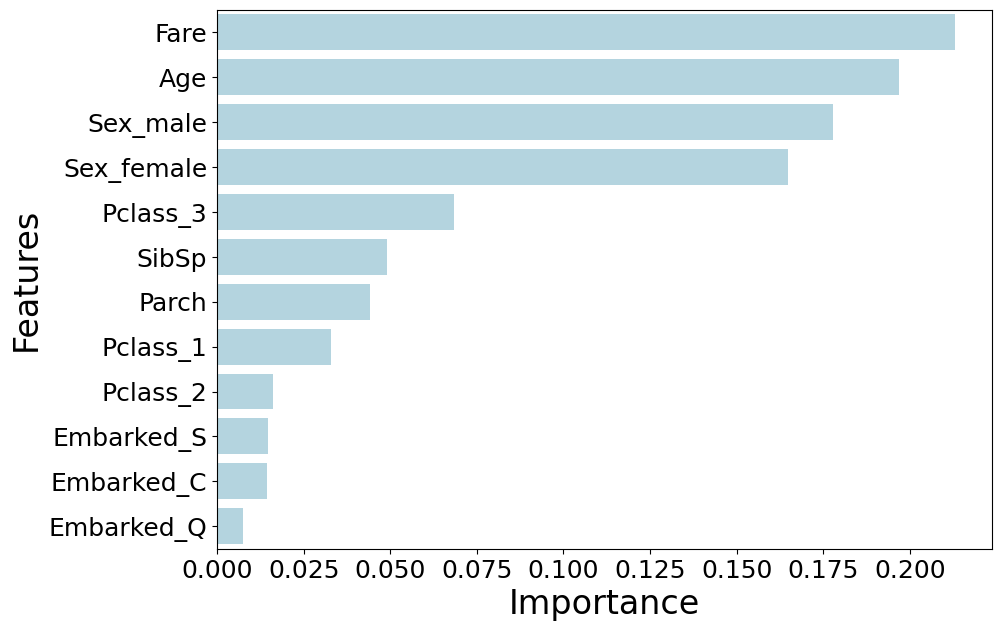

In [82]:
best_classifier = grid_search.best_estimator_
one_hot_columns_trans = list(best_classifier.named_steps['preprocessor'].named_transformers_['cat'][1].get_feature_names_out())
feature_importances = grid_search.best_estimator_['classifier'].feature_importances_
feature_importances

attributes = one_hot_columns_trans + num_columns


feature_importance_map = []
for imp, feat in sorted(zip(feature_importances, attributes), reverse=True):
    feature_importance_map.append([feat,imp])

df_importance = pd.DataFrame(feature_importance_map,columns=['Feature_name','importance'])

df_importance = df_importance.sort_values('importance',ascending=False)[:25].copy()

plt.figure(figsize=(10,7))
ax = sns.barplot(y='Feature_name',x='importance',data=df_importance,color='lightblue')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Importance',fontsize=24)
plt.ylabel('Features',fontsize=24)
plt.show()

In [83]:
X_test = df_test[X_train.columns].copy()
y_test = df_test['Survived'].copy()

In [84]:
predictions_test = best_classifier.predict(X_test)

In [85]:
precision = precision_score(y_test,predictions_test)
recall = recall_score(y_test,predictions_test)
accuracy = accuracy_score(y_test,predictions_test)

print('{} got {} precision'.format('',precision))
print('{} got {} recall'.format('',recall))
print('{} got {} accuracy'.format('',accuracy))


 got 0.8 precision
 got 0.631578947368421 recall
 got 0.8 accuracy


In [86]:
confusion_matrix(y_test,predictions_test)

array([[56,  6],
       [14, 24]])

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   MostFrequentImputer()),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        random_state=42))])

In [ ]:
pipeline = Pipeline(steps=[('preprocessor',column_transform),('classifier',RandomForestClassifier(random_state=42))])
params = [{'preprocessor': [column_transform],
          'classifier': [GradientBoostingClassifier(random_state=42)],
           'preprocessor__num__scaler': ['passthrough',MinMaxScaler(),StandardScaler()],
           'preprocessor__num__imputer__strategy': ['median','mean']
           }
          # {},
          # {}RandomForestClassifier(random_state=42),XGBClassifier(random_state=42)],
          #  'preprocessor__num__scaler': ['passthrough',MinMaxScaler(),StandardScaler()]
        # }
          ]

gs = GridSearchCV(pipeline,params , verbose=5, n_jobs=5,scoring='accuracy', cv=5).fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:

GridSearchCV(pipeline,params , verbose=5, n_jobs=5,scoring='accuracy', cv=5).get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('preprocessor',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('cat',
                                    Pipeline(steps=[('imputer',
                                                     MostFrequentImputer()),
                                                    ('cat_encoder',
                                                     OneHotEncoder(sparse=False))]),
                                    ['Pclass', 'Sex', 'Embarked']),
                                   ('num',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', 'passthrough')]),
                                    ['Age', 'SibSp', 'Parch', 'Fare'])])),
  ('classifier', RandomForestClassifier(random_state=42))],
 'estimator__verbose': False,
 'estimato

In [ ]:
gs.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('preprocessor',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('cat',
                                    Pipeline(steps=[('imputer',
                                                     MostFrequentImputer()),
                                                    ('cat_encoder',
                                                     OneHotEncoder(sparse=False))]),
                                    ['Pclass', 'Sex', 'Embarked']),
                                   ('num',
                                    Pipeline(steps=[('imputer', SimpleImputer()),
                                                    ('scaler', MinMaxScaler())]),
                                    ['Age', 'SibSp', 'Parch', 'Fare'])])),
  ('classifier', RandomForestClassifier(random_state=42))],
 'estimator__verbose': False,
 'estimator__preprocessor': ColumnTransformer(remainder='passthrough',
        

In [ ]:
df_gs = pd.DataFrame(grid_search.cv_results_)

In [ ]:
df_gs.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__n_estimators,param_preprocessor__num__imputer__strategy,param_classifier,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.356723,0.007383,0.019972,0.000827,10,200,most_frequent,NaN,"{'classifier__max_depth': 10, 'classifier__n_e...",0.825175,0.846154,0.795775,0.845070,0.816901,0.825815,0.018797,1
9,0.528143,0.008744,0.027252,0.002648,10,200,mean,NaN,"{'classifier__max_depth': 10, 'classifier__n_e...",0.825175,0.846154,0.781690,0.845070,0.823944,0.824407,0.023347,2
10,0.398200,0.077691,0.022389,0.004594,10,200,median,NaN,"{'classifier__max_depth': 10, 'classifier__n_e...",0.839161,0.846154,0.774648,0.845070,0.816901,0.824387,0.027018,3
7,0.185331,0.006374,0.014849,0.002606,10,100,median,NaN,"{'classifier__max_depth': 10, 'classifier__n_e...",0.832168,0.846154,0.774648,0.838028,0.823944,0.822988,0.025238,4
8,0.233867,0.042298,0.016385,0.002514,10,100,most_frequent,NaN,"{'classifier__max_depth': 10, 'classifier__n_e...",0.797203,0.839161,0.781690,0.845070,0.838028,0.820230,0.025721,5


In [ ]:
best_classifier = grid_search.best_estimator_

In [ ]:
best_classifier.named_steps['classifier']

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
best_classifier

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   MostFrequentImputer()),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        random_state=42))])

In [ ]:
best_classifier = grid_search.best_estimator_
one_hot_columns_trans = list(best_classifier.named_steps['preprocessor'].named_transformers_['cat'][1].get_feature_names_out())


In [ ]:
one_hot_columns_trans + num_columns

['Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Age',
 'SibSp',
 'Parch',
 'Fare']

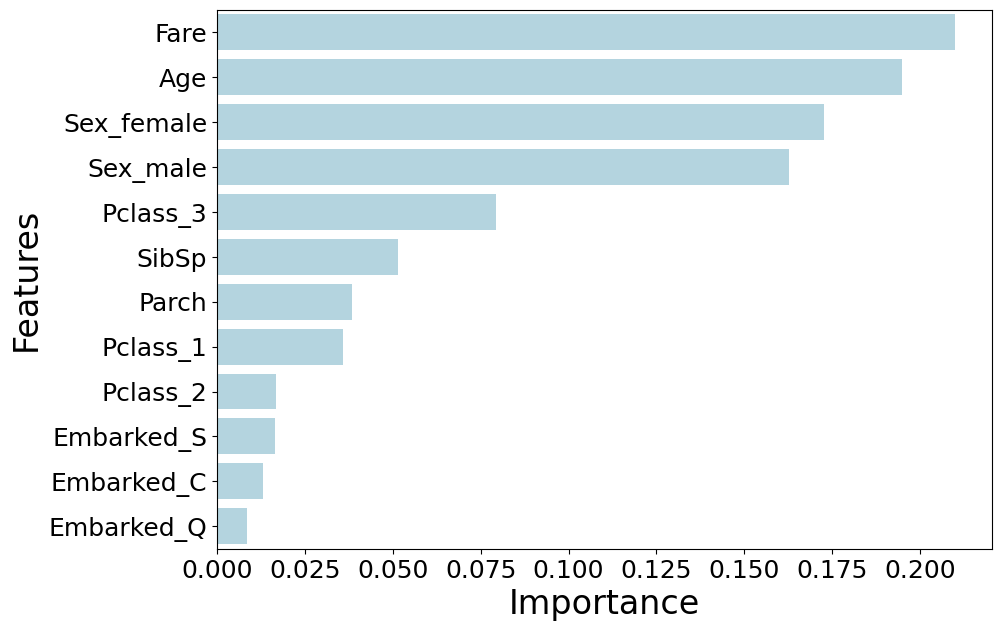

In [ ]:
feature_importances = grid_search.best_estimator_['classifier'].feature_importances_
feature_importances

attributes = one_hot_columns_trans + num_columns


feature_importance_map = []
for imp, feat in sorted(zip(feature_importances, attributes), reverse=True):
    feature_importance_map.append([feat,imp])

df_importance = pd.DataFrame(feature_importance_map,columns=['Feature_name','importance'])

df_importance = df_importance.sort_values('importance',ascending=False)[:25].copy()

plt.figure(figsize=(10,7))
ax = sns.barplot(y='Feature_name',x='importance',data=df_importance,color='lightblue')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Importance',fontsize=24)
plt.ylabel('Features',fontsize=24)
plt.show()

In [ ]:
gs.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   MostFrequentImputer()),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   'passthrough')]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [ ]:
predictions = grid_search.best_estimator_.predict(X_train)

In [ ]:
accuracy_score(y_train,predictions)

0.949438202247191

In [ ]:
precision = precision_score(y_train,predictions)
recall = recall_score(y_train,predictions)
accuracy = accuracy_score(y_train,predictions)

print('{} got {} precision'.format('',precision))
print('{} got {} recall'.format('',recall))
print('{} got {} accuracy'.format('',accuracy))


 got 0.9356223175965666 precision
 got 0.8134328358208955 recall
 got 0.9087078651685393 accuracy


In [ ]:
precision = precision_score(y_train,predictions)
recall = recall_score(y_train,predictions)
accuracy = accuracy_score(y_train,predictions)

print('{} got {} precision'.format('',precision))
print('{} got {} recall'.format('',recall))
print('{} got {} accuracy'.format('',accuracy))


 got 0.9762845849802372 precision
 got 0.8916967509025271 recall
 got 0.949438202247191 accuracy


In [ ]:
predictions_test = best_classifier.predict(X_test)

In [ ]:
precision = precision_score(y_test,predictions_test)
recall = recall_score(y_test,predictions_test)
accuracy = accuracy_score(y_test,predictions_test)

print('{} got {} precision'.format('',precision))
print('{} got {} recall'.format('',recall))
print('{} got {} accuracy'.format('',accuracy))


 got 0.75 precision
 got 0.6923076923076923 recall
 got 0.8044692737430168 accuracy
